In [2]:
import pickle
import pandas as pd
with open('model\lda_model.pkl', 'rb') as f:
  lda_model = pickle.load(f) #import lda model
  
data = pd.read_csv('dataset/DatasetLegal.csv') #read data
question_data = data['question']

with open('model/topic_dict.pkl', 'rb') as f:
  topic_dict = pickle.load(f)

with open('model/question_lda.pkl', 'rb') as f:
   question_lda = pickle.load(f)

with open('model/id2word.pkl', 'rb') as f:
   id2word = pickle.load(f)

for each_doc in question_lda:
    i = 0
    for each_topic in each_doc:
        if(each_topic[0] == i): i+=1
        else: 
            each_doc.insert(i, (i, 0))
            i+=1
    while(i < 6):
        each_doc.append((i, 0))
        i+=1
list_topic = []
for each_doc in question_lda:
    list_topic_each_doc = []
    for each_topic in each_doc:
        list_topic_each_doc.append(each_topic[1])
    list_topic.append(list_topic_each_doc)
list_topic

[[0.035494488, 0.026652364, 0.60259175, 0.059402272, 0.21648578, 0.059373368],
 [0.278622, 0.06714439, 0.54005206, 0.017606834, 0.07225296, 0.024321767],
 [0.11121966, 0.010001538, 0.023806276, 0.20324218, 0.6403387, 0.011391605],
 [0.80063915, 0.029094314, 0.07719158, 0.039709408, 0.026180075, 0.027185543],
 [0.033126604, 0.23656176, 0.01903138, 0.061574817, 0.56062186, 0.08908362],
 [0.0350982, 0.7465349, 0.035038333, 0.11360475, 0.039282653, 0.030441185],
 [0.024975626, 0.110365815, 0.023449766, 0.09733195, 0.720407, 0.02346981],
 [0.18839464, 0.31186372, 0.03704187, 0.28942946, 0.12768787, 0.045582455],
 [0.9108552, 0.01650766, 0.011711805, 0.011631177, 0.03402015, 0.015274053],
 [0.019950993, 0.7875749, 0.030843839, 0.014026694, 0.12511462, 0.022489037],
 [0.047036037, 0.307564, 0.047420476, 0.106929444, 0.05455834, 0.43649176],
 [0.066520765, 0.11493565, 0.1155703, 0.06543883, 0.07892869, 0.5586058],
 [0.08010988, 0.11247933, 0.11456193, 0.45023733, 0.15040717, 0.092204385],
 [0.

In [3]:
distribution_0 = []
distribution_1 = []
distribution_2 = []
distribution_3 = []
distribution_4 = []
distribution_5 = []
for topic_each_doc in list_topic:
    topic_each_doc.sort()
    distribution_0.append(topic_each_doc[5])
    distribution_1.append(topic_each_doc[4])
    distribution_2.append(topic_each_doc[3])
    distribution_3.append(topic_each_doc[2])
    distribution_4.append(topic_each_doc[1])
    distribution_5.append(topic_each_doc[0])

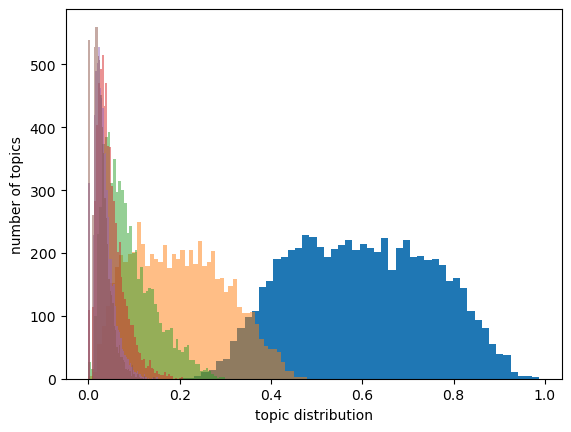

In [12]:
import matplotlib.pyplot as plt
num_bins = 50
label = ['0','1','2','3','4','5']
plt.hist(distribution_0, num_bins)
plt.hist(distribution_1, num_bins, alpha=0.5)
plt.hist(distribution_2, num_bins, alpha=0.5)
plt.hist(distribution_3, num_bins, alpha=0.5)
plt.hist(distribution_4, num_bins, alpha=0.5)
plt.hist(distribution_5, num_bins, alpha=0.5)
plt.xlabel('topic distribution')
plt.ylabel('number of topics')
plt.show()

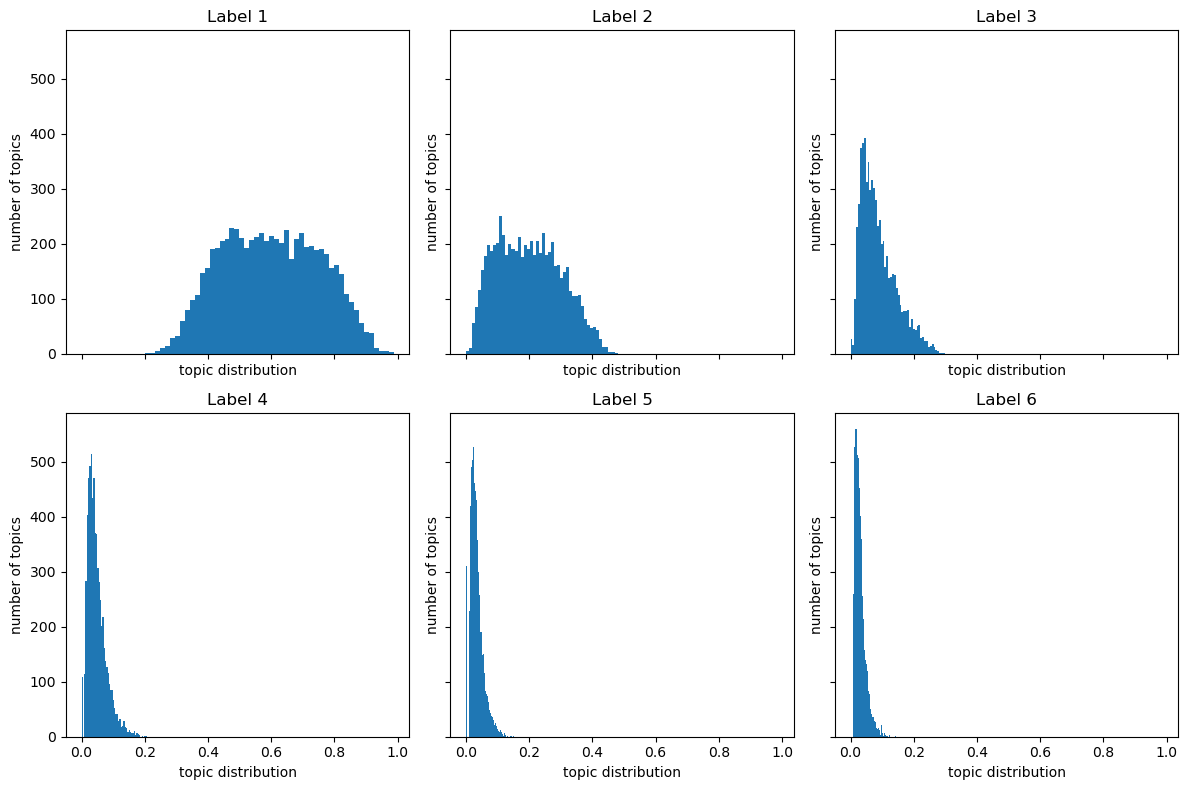

In [13]:
# Define the number of bins and labels
num_bins = 50
# labels = ['succession', 'violation', 'family', 'criminal', 'contract', 'labor']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=True, sharex=True)

# Plot each histogram in a separate subplot
axes[0, 0].hist(distribution_0, num_bins)
axes[0, 0].set_xlabel('topic distribution')
axes[0, 0].set_ylabel('number of topics')
axes[0, 0].set_title('Label 1')

axes[0, 1].hist(distribution_1, num_bins)
axes[0, 1].set_xlabel('topic distribution')
axes[0, 1].set_ylabel('number of topics')
axes[0, 1].set_title('Label 2')

axes[0, 2].hist(distribution_2, num_bins)
axes[0, 2].set_xlabel('topic distribution')
axes[0, 2].set_ylabel('number of topics')
axes[0, 2].set_title('Label 3')

axes[1, 0].hist(distribution_3, num_bins)
axes[1, 0].set_xlabel('topic distribution')
axes[1, 0].set_ylabel('number of topics')
axes[1, 0].set_title('Label 4')

axes[1, 1].hist(distribution_4, num_bins)
axes[1, 1].set_xlabel('topic distribution')
axes[1, 1].set_ylabel('number of topics')
axes[1, 1].set_title('Label 5')

axes[1, 2].hist(distribution_5, num_bins)
axes[1, 2].set_xlabel('topic distribution')
axes[1, 2].set_ylabel('number of topics')
axes[1, 2].set_title('Label 6')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

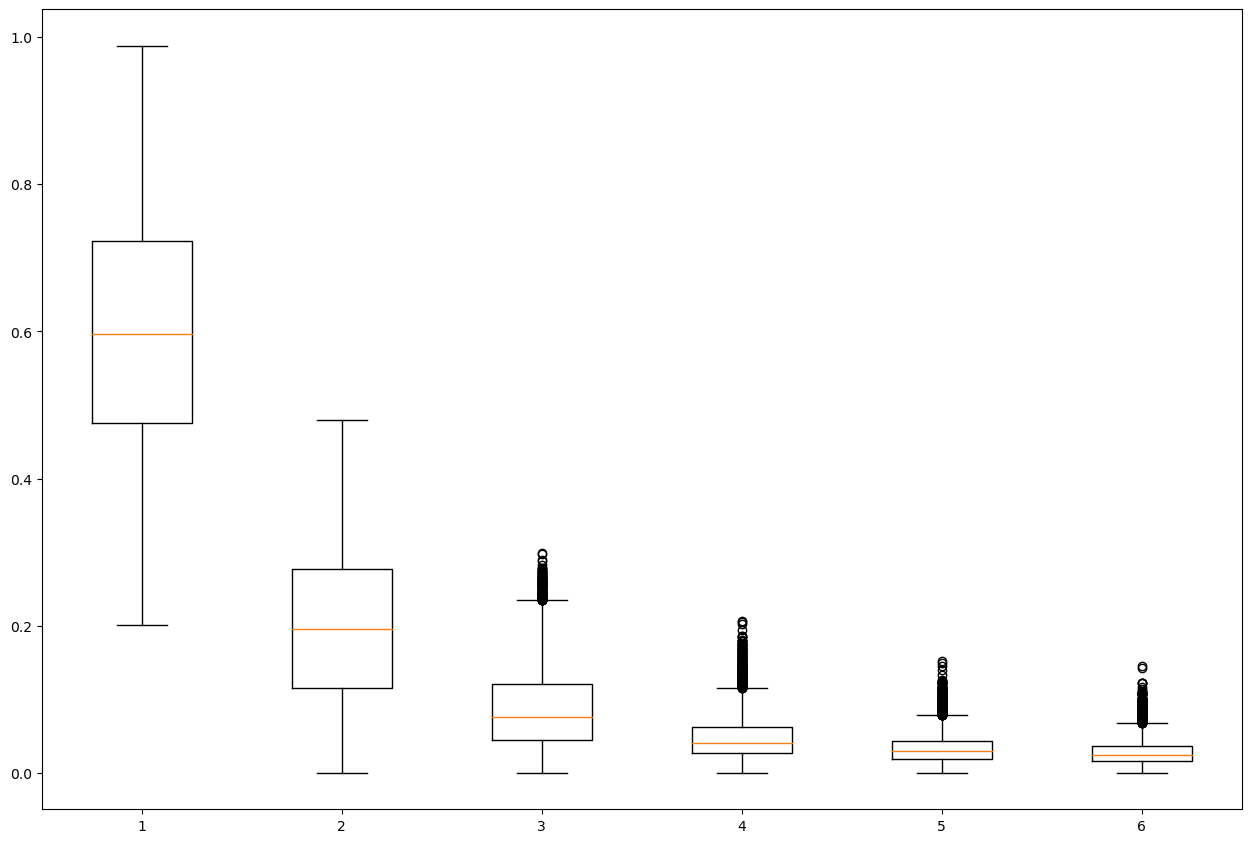

In [14]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0, 0, 1, 1])
data = [distribution_0, distribution_1, distribution_2, distribution_3, distribution_4, distribution_5]
bp = ax.boxplot(data)

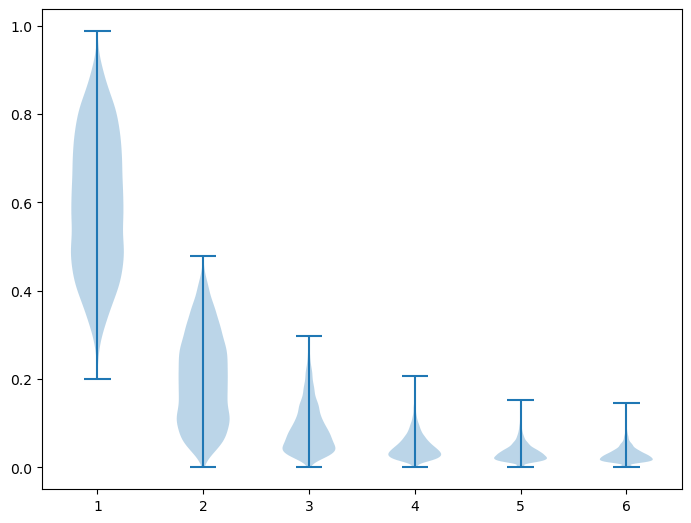

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
vp = ax.violinplot(data)
plt.show()

In [20]:
# question_lda
num_top_topic = []
for each_doc in list_topic:
    count = 0
    for each_topic in each_doc:
        if(each_topic>0.167): count+=1
    num_top_topic.append(count)

count_num_top_topic = [0,0,0,0,0,0,0]
for n in num_top_topic:
    if(n==0): count_num_top_topic[0]+=1
    elif(n==1): count_num_top_topic[1]+=1
    elif(n==2): count_num_top_topic[2]+=1
    elif(n==3): count_num_top_topic[3]+=1
    elif(n==4): count_num_top_topic[4]+=1
    elif(n==5): count_num_top_topic[5]+=1
    elif(n==6): count_num_top_topic[6]+=1
count_num_top_topic

[0, 2689, 3124, 687, 31, 0, 0]

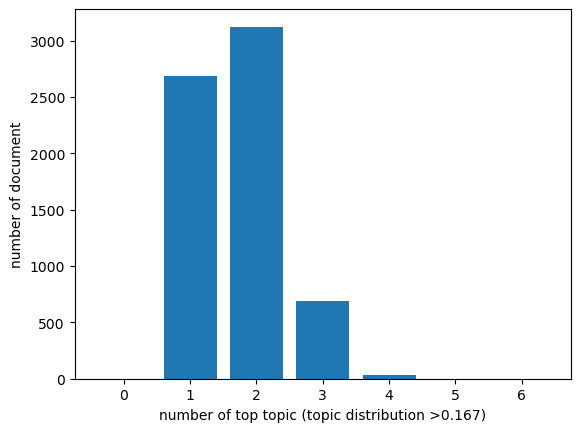

In [22]:
x = ['0','1','2','3','4','5','6']
y = count_num_top_topic
plt.bar(x, y)
plt.xlabel('number of top topic (topic distribution >0.167)')
plt.ylabel('number of document')
plt.show()

In [26]:
top_topic=[]
for each_topic in question_lda:
  temp_pred = []
  for topic in each_topic:
    if(topic[1]>0.167): temp_pred.append(1)
    else: temp_pred.append(0)
  top_topic.append(temp_pred)
# y_predict = np.array(y_predict)
pd.DataFrame(top_topic)

,0,1,2,3,4,5
0,0,0,1,0,1,0
1,1,0,1,0,0,0
2,0,0,0,1,1,0
3,1,0,0,0,0,0
4,0,1,0,0,1,0
...,...,...,...,...,...,...
6526,0,0,0,1,1,0
6527,0,0,0,1,1,0
6528,0,0,0,1,1,0
6529,0,0,0,1,0,0


In [42]:
count_topic_doc = [0,0,0,0,0,0]
for each_topic in top_topic:
    for i in range(6):
        if(each_topic[i]==1): count_topic_doc[i]+=1
count_topic_doc

[2112, 2669, 1199, 855, 3619, 668]

<AxesSubplot:>

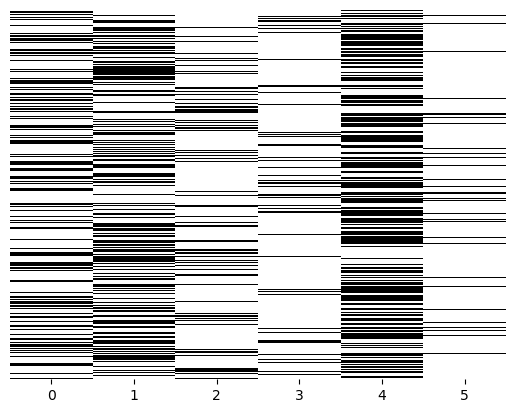

In [41]:
import seaborn as sns
import numpy as np

data = np.array(top_topic)
sns.heatmap(data, cmap='Greys', xticklabels=['0', '1', '2', '3', '4', '5'], yticklabels=False, cbar=False)